# Solar Power Generation Prediction & Fault/Abnormalities Analysis

## PV Solar Power Plant:

Photo Voltaic Solar Power has emerged as the best source of green energy in recent past in a country like India which gets a good amount of solar insolation. With the continuous development of efficient PV modules, Battery storage and Smart Grid etc. Power Generation through PV Solar Plant has gained the momentum further and has a very promising future.

  The solar power plant is also known as the Photovoltaic (PV) power plant. It is a large-scale PV plant designed to produce bulk electrical power from solar radiation. The solar power plant uses solar energy to produce electrical power. Therefore, it is a conventional power plant.Solar energy can be used directly to produce electrical energy using solar PV panels.Hence, to produce electrical power on a large scale, solar PV panels are used. Below is the layout plan of photovoltaic power plant.

<img src="https://gec.jp/jcm/en/wp-content/uploads/2018/07/ba5ce1cae920df16aecff92a5667d64c.png">

The above picture shows a typical structure of a solar power plant. Sunlight falls on PV modules, generates DC Power which is fed to the Inverters (through some Junction Box and String Monitoring Box), Inverters convert DC Power to AC Power, AC Power is stepped up through Transformers to match Grid Voltage and finally fed to the Grid through some Switchgear.

## Challanges with PV Solar Power Generation:

1. Unlike conventional coal or gas based power plants, Solar Power Plants output are available during day time only and highly variable depending upon the availability of Sunlight.
2. Power generated has to be consumed instantly in the absence of a power storage (Battery storage is still emerging)
3. Spread over a large area, should be shadow free. 
4. Regular cleaning of PV modules and physical fault detection in the field side.

## Data Description

We have at hand solar power generation data and weather data of a solar plower plants. Let's explore the given data, draw some insights, try to meet our challenges and predict/forecast the plant output to the extent possible which can be used for a better Grid Management/Stability

 Plant_2_Generation_Data.csv :  In this data set - DATE_TIME, PLANT_ID, DC_Power, AC_POWER, DAILY_YIELD, TOTAL_YIELD are given

Plant_2_Weather_Sensor_Data.csv : In this data set - DATE_TIME, PLANT_ID, SOURCE_KEY, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION are given

## Solar radiation terminology :

Peak sun hours (PSH): Daily irradiation is commonly referred to as daily PSH (or full sun hours). The number of PSH for the day is the number of hours for which power at the rate of 1kW/m2 would give an equivalent amount of energy to the total energy for that day. The terms peak sunlight hours and peak sunshine hours may also be used. Irradiation: The total quantity of radiant solar energy per unit area received over a given period, e.g. daily, monthly or annually. Insolation: Another term for irradiation. The amount of solar radiation, incident on the surface over a period of time, Peak sun hours (kWh/m2/ day) are a measurement of daily insolation. Irradiance: The solar radiation incident on a surface at any particular point in time measured in W/m2.

</center><img src="https://gumlet.assettype.com/iglobalnews%2Fimport%2F2018%2F05%2FVikram_Solar_40_MW.jpg?auto=format%2Ccompress&format=webp&w=768&dpr=1.0" width="80%">
</center>


**Example**

If sunlight is received at an irradiance of 1000W/m2 for 2 hours, 600W/m2 for 1.5 hours and 200W/m2 for 1 hour, the total radiation received that day is 3.1PSH:

1000W/m2 × 2 hours + 600W/m2 × 1.5 hours + 200W/m2 × 1 hour = 3100W/m2/day

3100W/m2/day ÷ 1000W/m2/day = 3.1PSH

### 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('precision',3)

### 2. Importing Power Generation & Weather Sensor Data

In [4]:
generation_data = pd.read_csv('Plant_2_Generation_Data.csv')

In [5]:
weather_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [6]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
43293,2020-06-06 10:30:00,4136001,oZ35aAeoifZaQzV,1257.993,1226.893,2480.133,1660128841.133
5637,2020-05-17 16:15:00,4136001,LYwnQax7tkwH5Cb,636.992,624.031,5008.692,1794975276.692
2191,2020-05-16 01:00:00,4136001,WcxssY2VbP4hApt,0.000,0.000,0.000,181704882.000
49862,2020-06-09 13:15:00,4136001,LlT2YUhhzqhg5Sw,0.000,0.000,1738.000,282747359.000
45191,2020-06-07 08:00:00,4136001,xoJJ8DcxJEcupym,305.336,299.871,270.143,209269326.143


In [7]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
3209,2020-06-17 11:30:00,4136001,iq8k7ZNt4Mwm3w0,26.714,33.690,0.402
905,2020-05-24 10:45:00,4136001,iq8k7ZNt4Mwm3w0,33.200,56.135,0.898
7,2020-05-15 01:45:00,4136001,iq8k7ZNt4Mwm3w0,26.420,25.065,0.000
1637,2020-06-01 02:00:00,4136001,iq8k7ZNt4Mwm3w0,24.439,23.298,0.000
1570,2020-05-31 09:15:00,4136001,iq8k7ZNt4Mwm3w0,29.560,39.407,0.442


### 3. Adjust datetime format

In [8]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

### 4. Merging generation data and weather sensor data  

In [9]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
32157,2020-06-01 03:30:00,Quc1TzYxW2pYoWX,0.000,0.000,5399.000,329584238.000,23.788,23.315,0.000
3715,2020-05-16 18:15:00,vOuJvMaM2sgwLmb,0.000,0.000,4898.000,2226434.000,29.016,26.250,0.000
13058,2020-05-21 15:15:00,LYwnQax7tkwH5Cb,851.760,833.460,3608.467,1794989967.467,35.808,51.320,0.605
26091,2020-05-29 04:15:00,LlT2YUhhzqhg5Sw,0.000,0.000,0.000,282690653.000,25.284,24.245,0.000
29696,2020-05-30 23:30:00,mqwcsP2rE7J0TFp,0.000,0.000,8049.000,593706138.000,27.799,25.041,0.000


### 5. Adding separate time and date columns  

In [10]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.0,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [11]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

In [12]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

There is no Missing Values in the dataset

In [13]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000
mean,246.702,241.278,3294.890,658944788.424,27.987,32.607,0.229,15.531,5.530,22.563,22.517,714.330
std,370.570,362.112,2919.448,729667771.073,4.021,11.226,0.309,8.528,0.499,1.475,16.764,415.672
min,0.000,0.000,0.000,0.000,20.942,20.265,0.000,1.000,5.000,20.000,0.000,0.000
25%,0.000,0.000,272.750,19964944.867,24.570,23.686,0.000,9.000,5.000,21.000,15.000,360.000
50%,0.000,0.000,2911.000,282627587.000,26.910,27.434,0.019,16.000,6.000,23.000,30.000,720.000
75%,446.592,438.215,5534.000,1348495113.000,30.913,40.019,0.431,22.000,6.000,24.000,45.000,1080.000
max,1420.933,1385.420,9873.000,2247916295.000,39.182,66.636,1.099,31.000,6.000,25.000,45.000,1425.000


### 6. Converting 'SOURCE_KEY' from categorical form to numerical form

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


# Data Visualization:

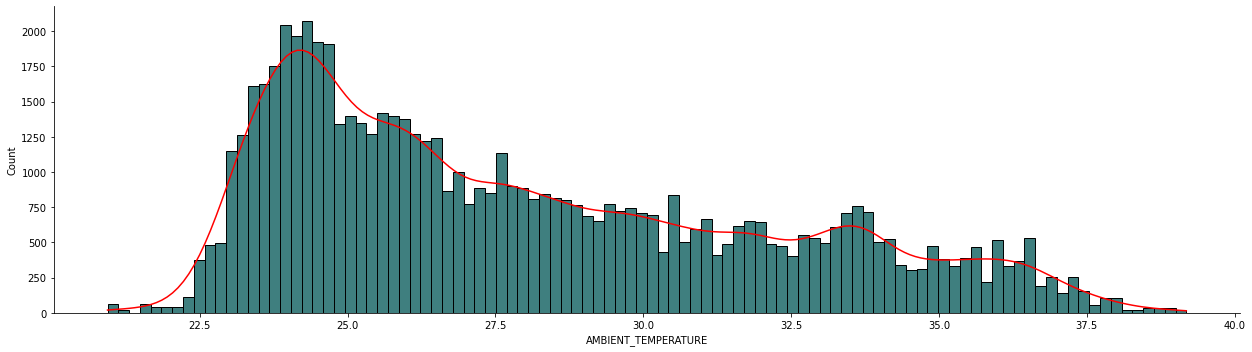

In [15]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [16]:
df_solar['DATE'].nunique()

34

The data of solar power generation is of 34 days 

### Faults & Abnormalities detection in solar power plant generation 

### 7. Multiple Plotting of DC_POWER generation on per day basis.

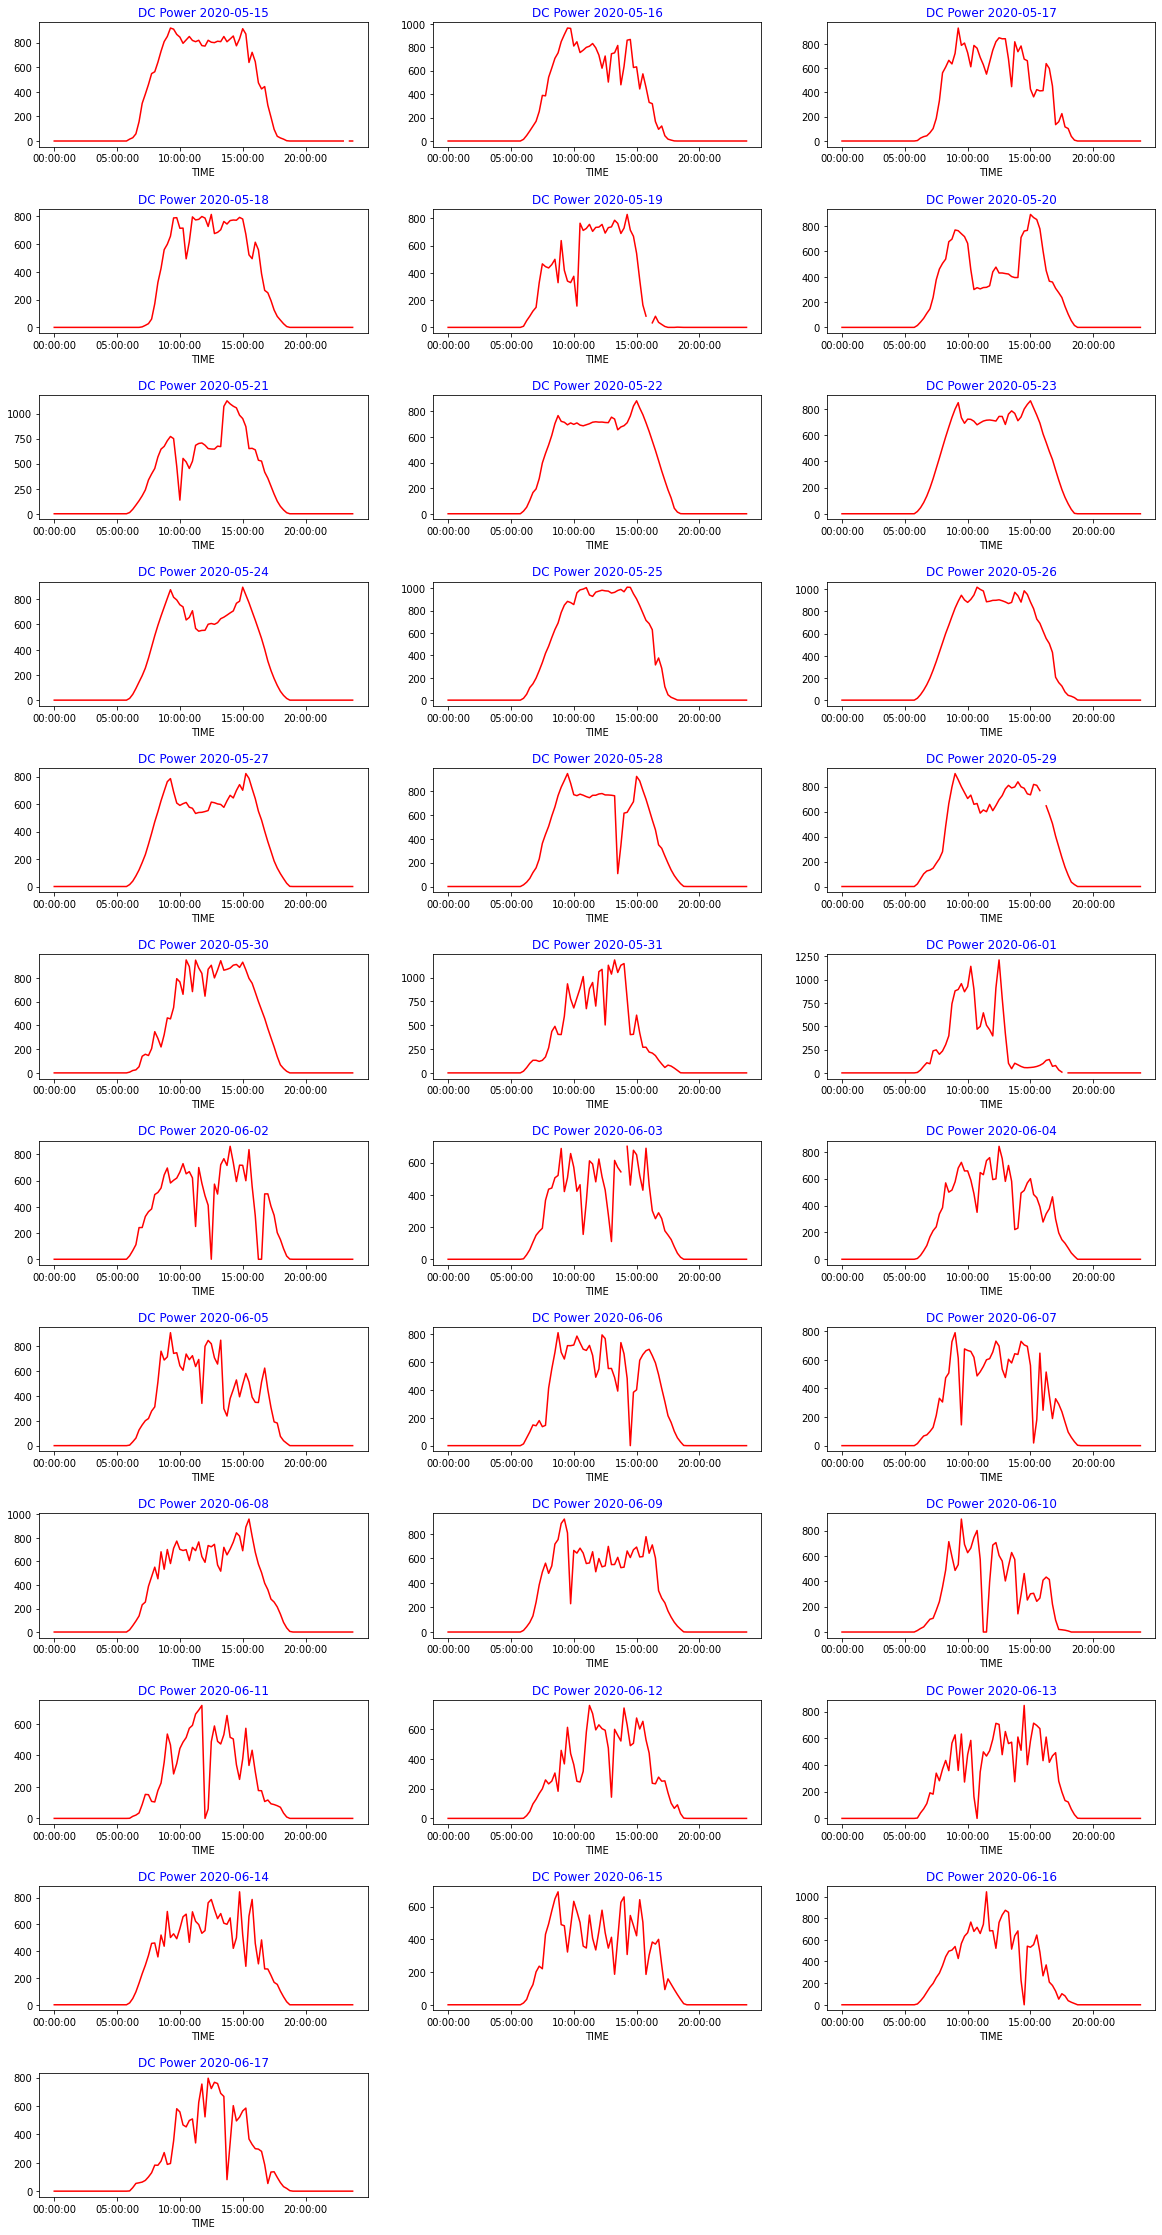

In [17]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc, row=12, col=3)

# # Ideal Graph of Solar Power Generation 

<img src="https://www.solarmarket.com.au/wp-content/uploads/2021/04/solar-output-graph.png" alt="Solar Panel" width="50%">
</center>

The reason we get this shape is based on the angle of the sun to your panels. In the early morning, when the sun is still rising, it’s essentially at its lowest point in the sky. In order for the sunlight to reach your panels at this time of the day, it has to cut through the most amount of atmosphere. This is important to note, because energy from the sun is absorbed when it travels through the atmosphere. So, this means that the more atmosphere it travels through, the more energy is absorbed and the less that is available for your panels to convert into electricity. At midday, when the sun is directly overhead, sunlight doesn’t need to travel through as much atmosphere. Therefore, your panels will absorb more sunlight during this time.

- In winter, the same concept applies. However, on gloomier winter days there may be less sunlight for your panels to absorb. 
- This can simply be explained by the sun being positioned lower in the sky than it is during summer. 

# # Abnormalities in DC_POWER Generation

**Form the per day DC_POWER generation graph we can find that, most of the days there is a some fluctuation in the power generation.**

*Less Fluctuation in DC_POWER generation is observed in these days.*

1. 2020-05-15
2. 2020-05-18
3. 2020-05-22
4. 2020-05-23
5. 2020-05-24
6. 2020-05-25
7. 2020-05-26

*High Fluctuation in DC_POWER generation is observed in these days.*

1. 2020-05-19
2. 2020-05-28
3. 2020-05-29
4. 2020-06-02
5. 2020-06-03
6. 2020-06-04
7. 2020-06-13
8. 2020-06-14
9. 2020-06-17

*Very High Fluctuation & Reduction in DC_POWER generation is observed in these days.*

1. 2020-06-03
2. 2020-06-11
3. 2020-06-12
4. 2020-06-15

**Note: Reason for very high Fluctuation & Reduction in DC_POWER generation is due to fault in the system or may be fluctuation in weather or due to clouds etc. which need to be analyse further**

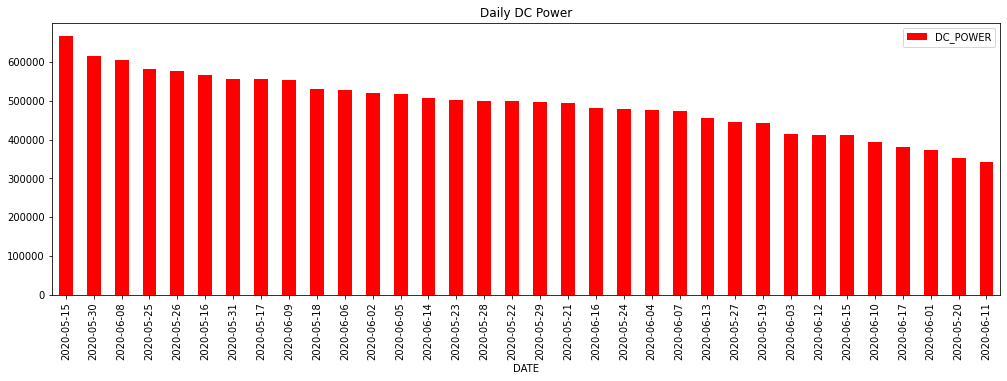

In [18]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

**Form the per day DC_POWER generation graph we can find the average power generation per day.**

*Highest average DC_POWER Generation is on*: **2020-05-15**

*Lowest average DC_POWER Generation is on* : **2020-06-11**

  NOTE: This Large variation in the DC_POWER generation is due to the fault in the system or due to weather change, which needs to study further. But from this bar plot we find the day on which there is highest DC_POWER is generated and the day with the lowest DC_POWER generated.

## 8. Multiple Plotting of IRRADIATION generation on per day basis.

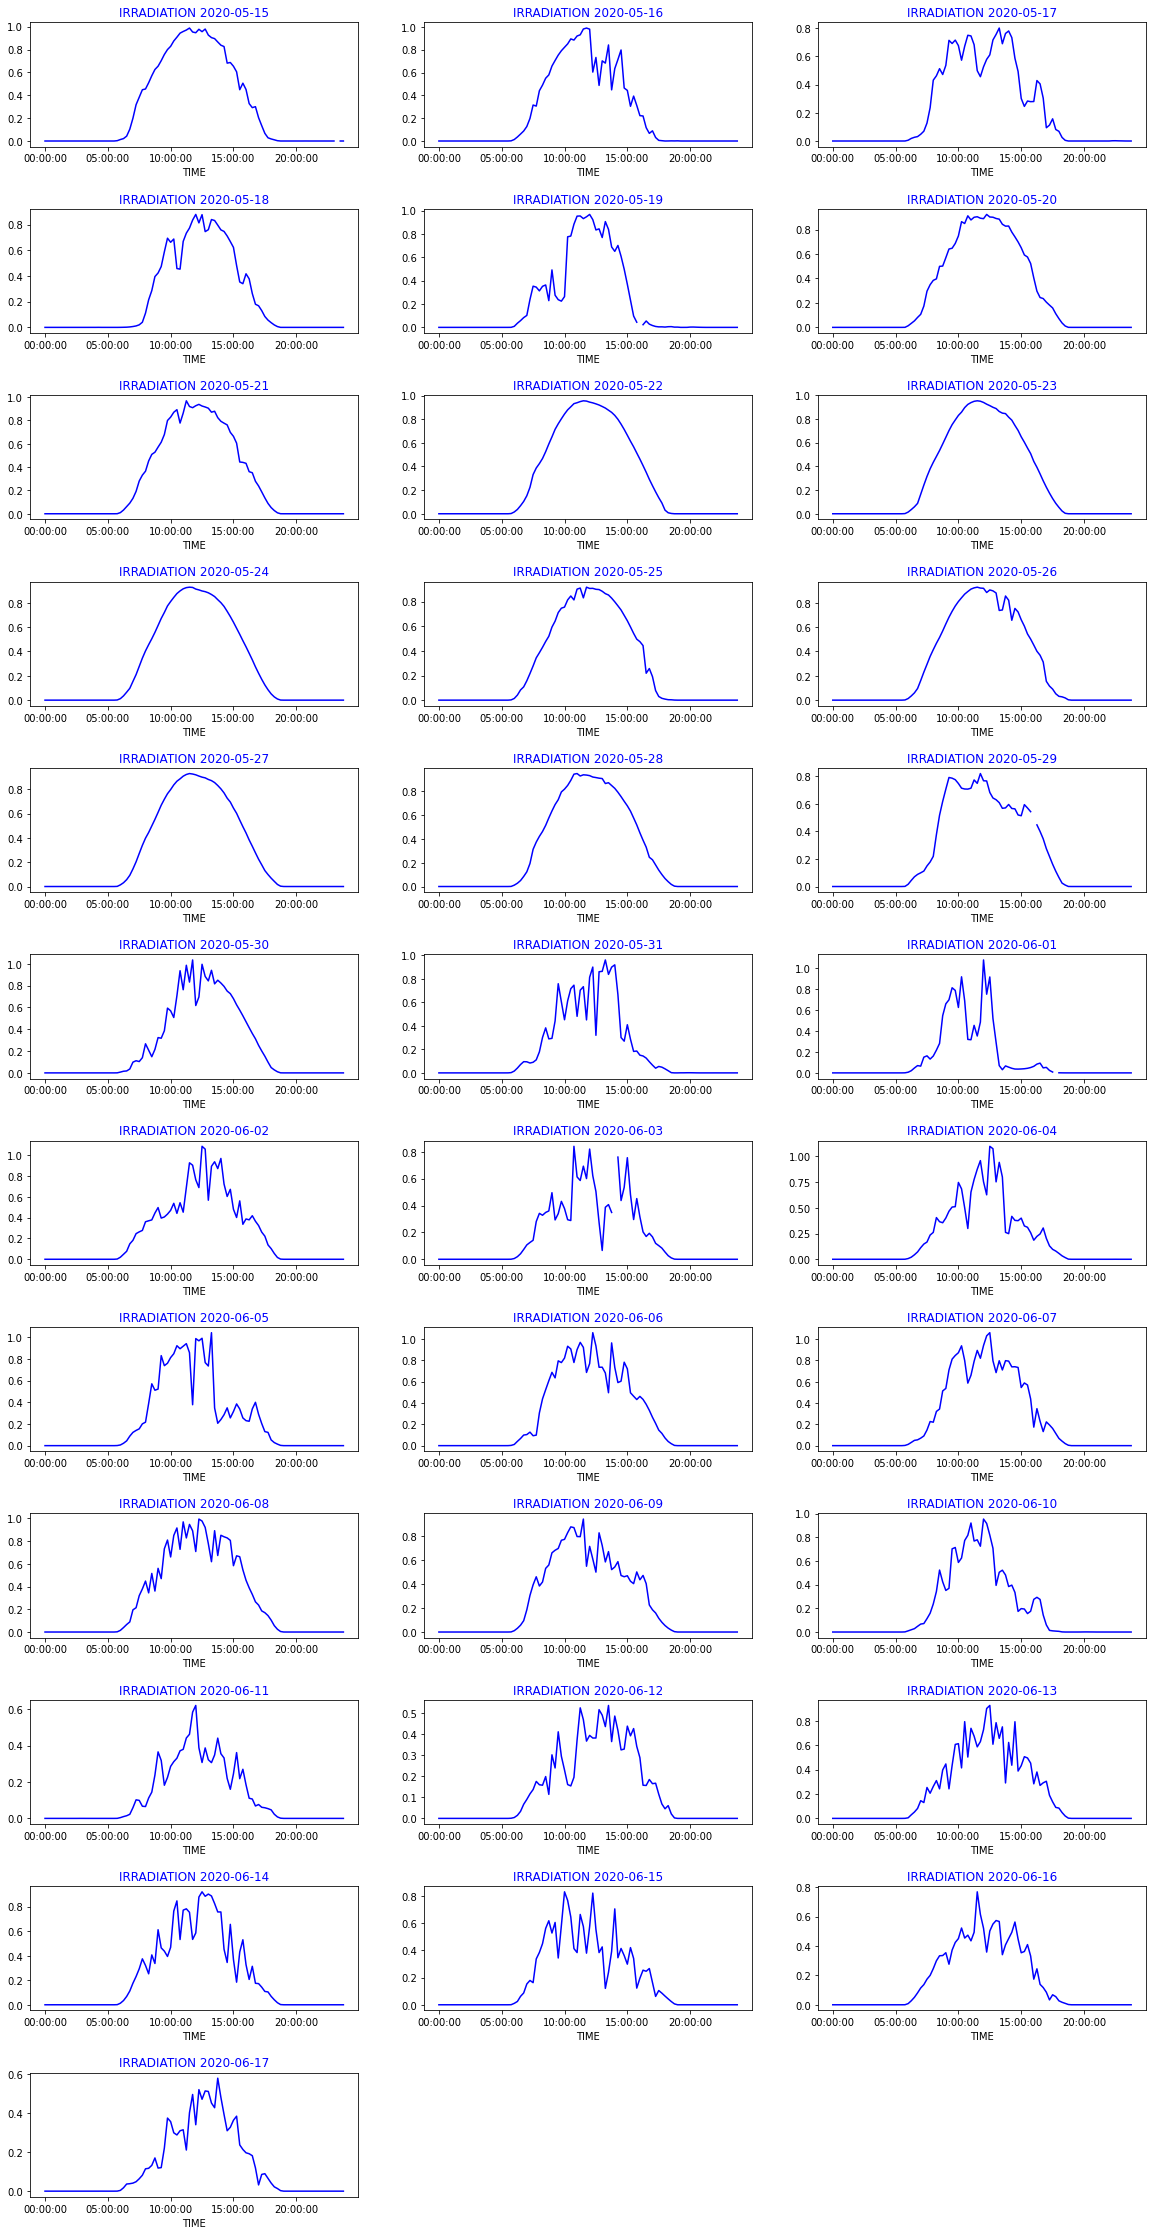

In [19]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

**IRRADIATION graph pattern is looking very similar to the corresponding DC_POWER generation on per day basis.** 

- In solar power plant DC_POWER or Output power is mostly depends on IRRADIATION .Or it is not wrong to say that it’s directly proportional.

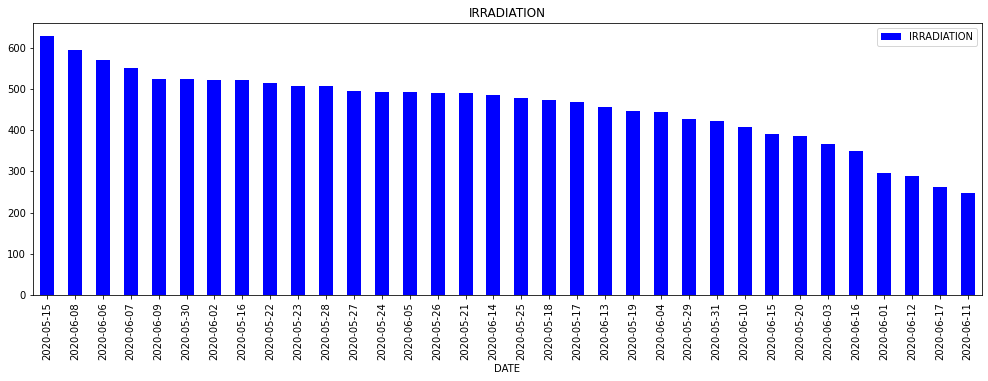

In [20]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

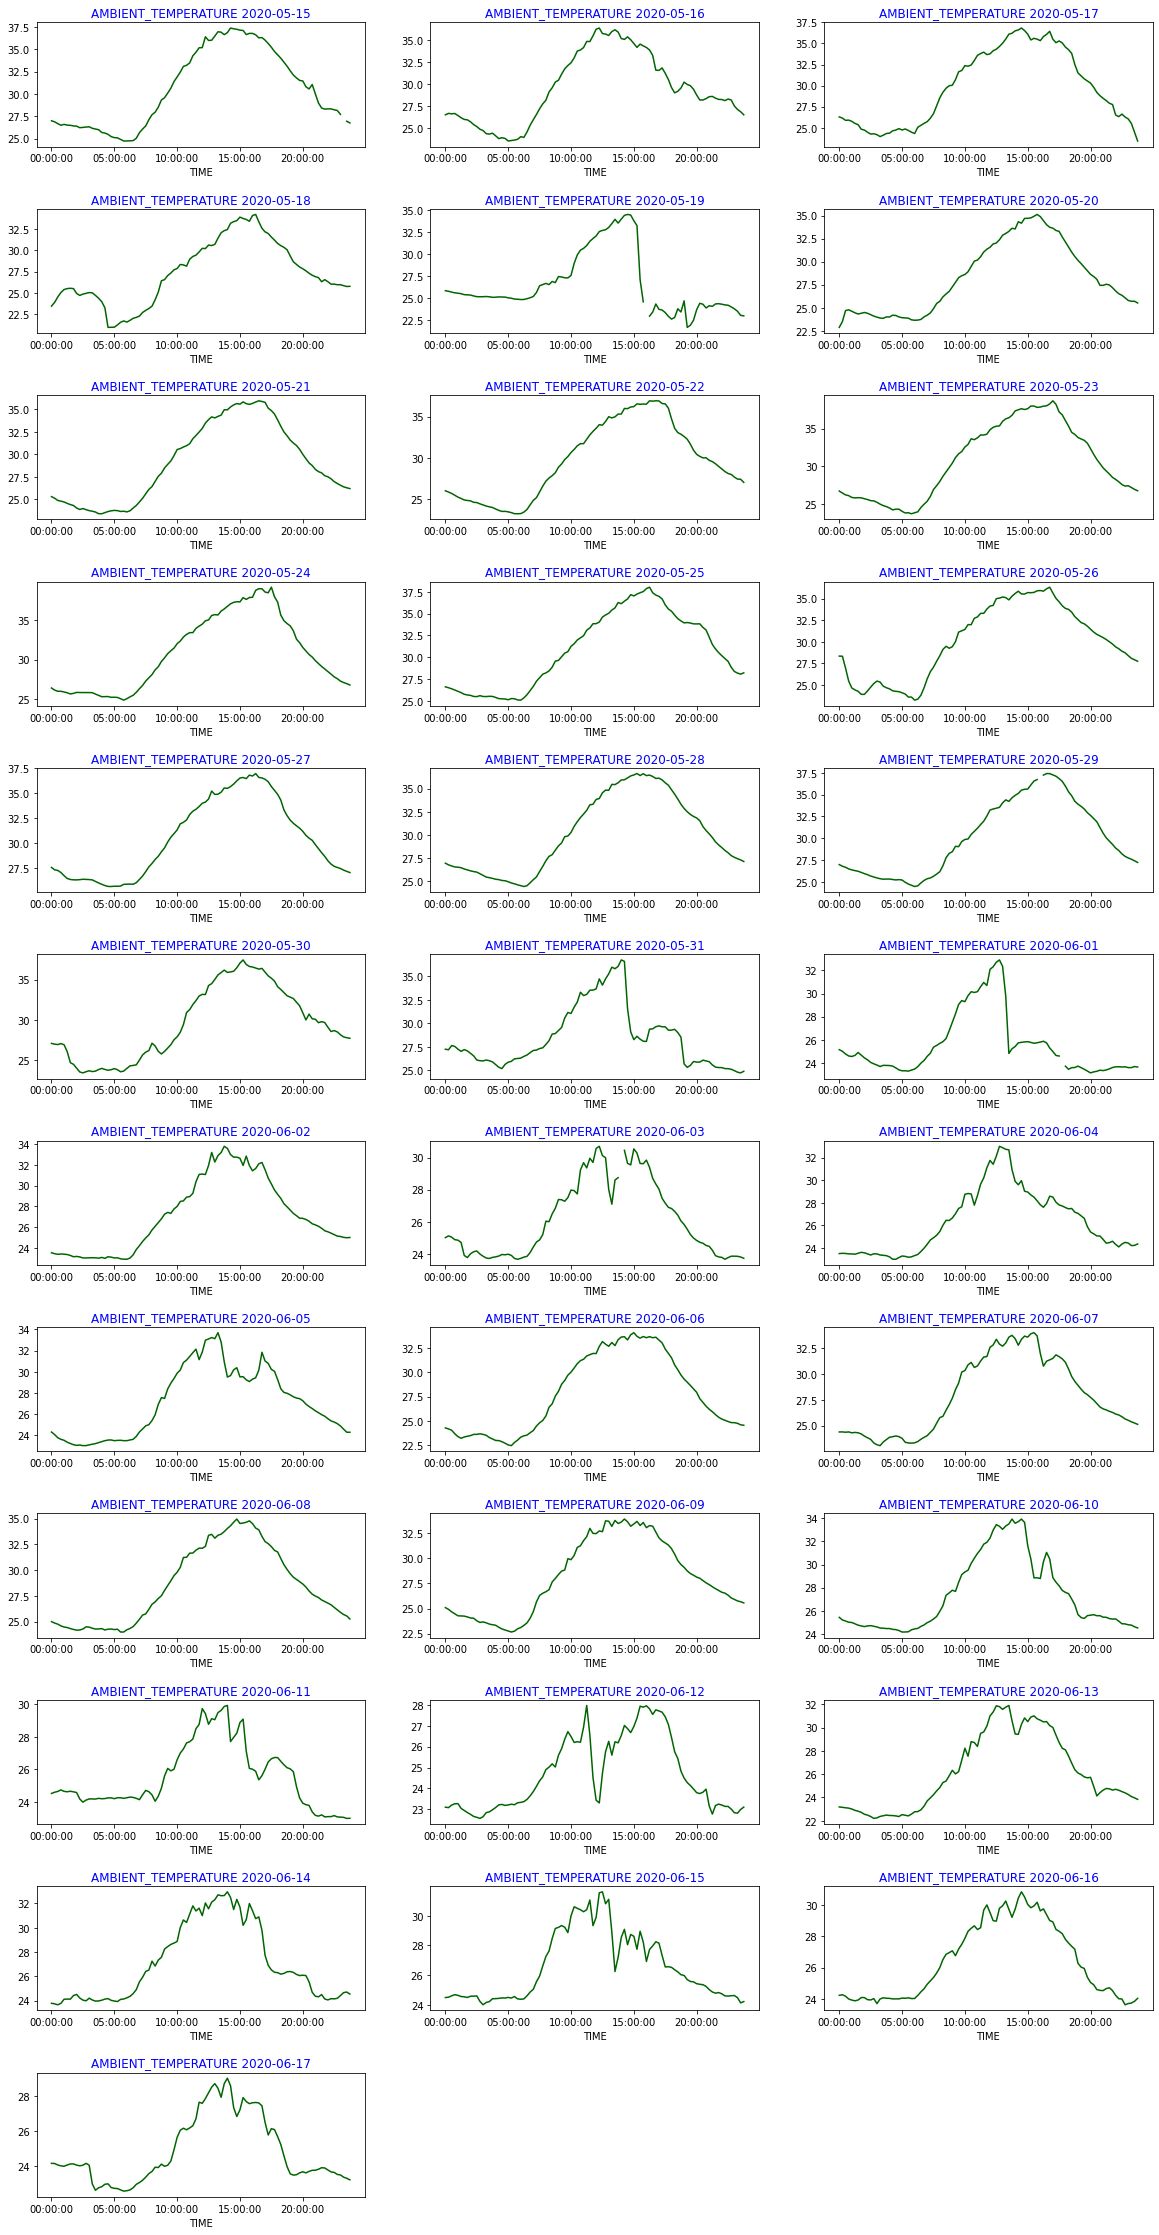

In [21]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

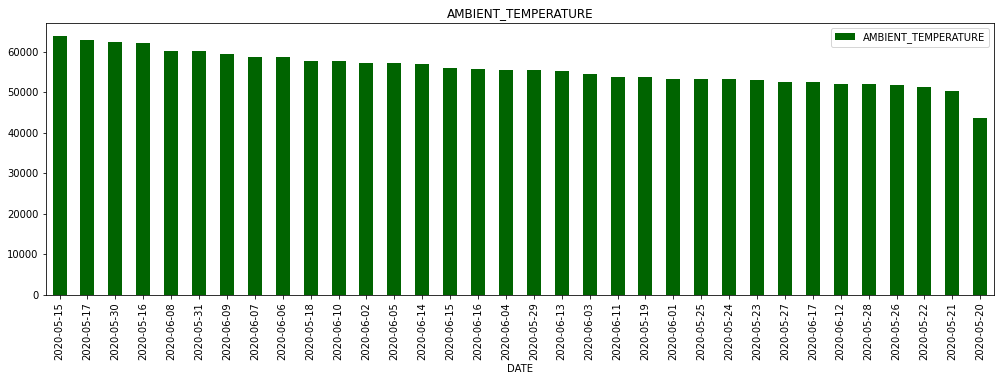

In [22]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

# Best and Worst Power generation comparision:

## Major Environmental Factors affecting the of solar power generation are.

### 9. Highest average DC_POWER is generated on "2020-05-15"

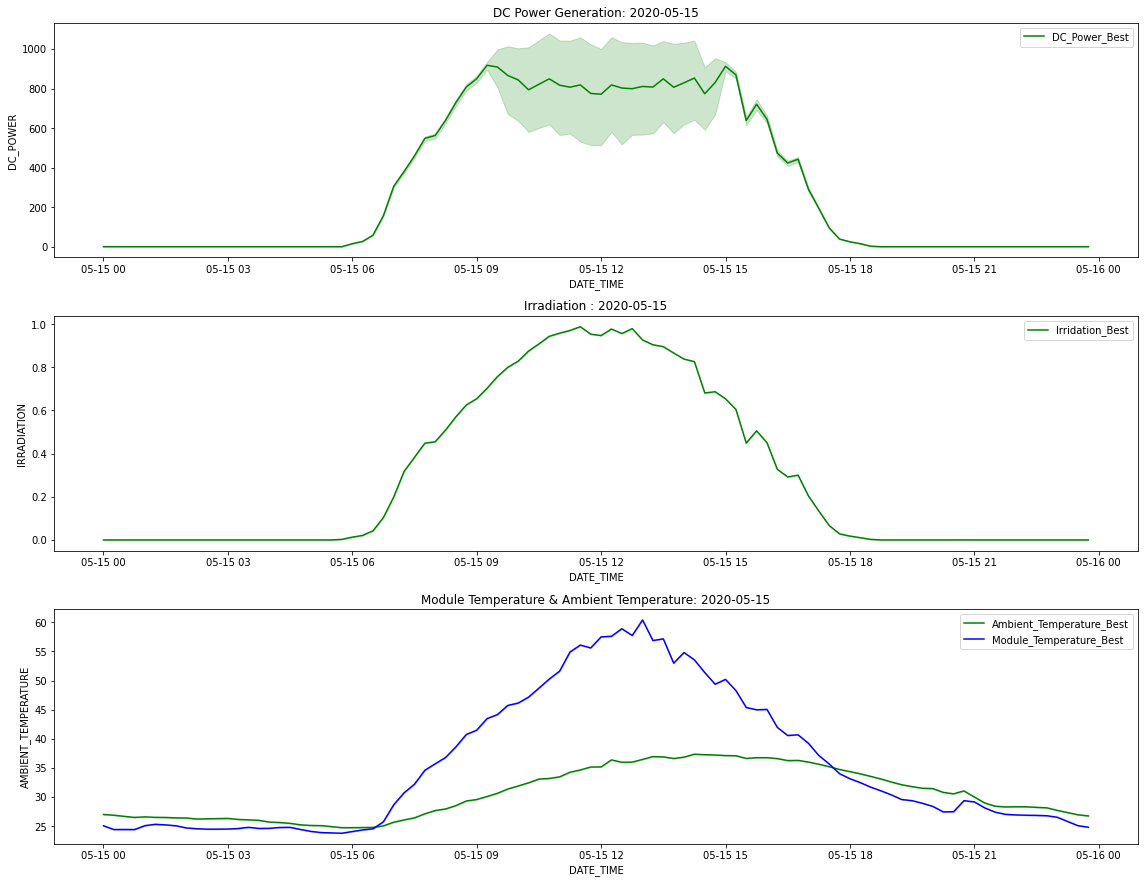

In [23]:
plt.figure(figsize=(16,16))

date=["2020-05-15"]

plt.subplot(411)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best",color='green');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Best",color='green');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best",color='green');
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

  NOTE: Both DC_POWER graph and IRRADIATION graph is almost looking like an ideal graph which is explained earlier. Weather is also looking good, and there is no cloud is in the sky because there is very less variation in IRRADIATION and temperature of the solar panel and ambient temperature.

### 10. Lowest average DC_POWER is generated on "2020-06-11"  

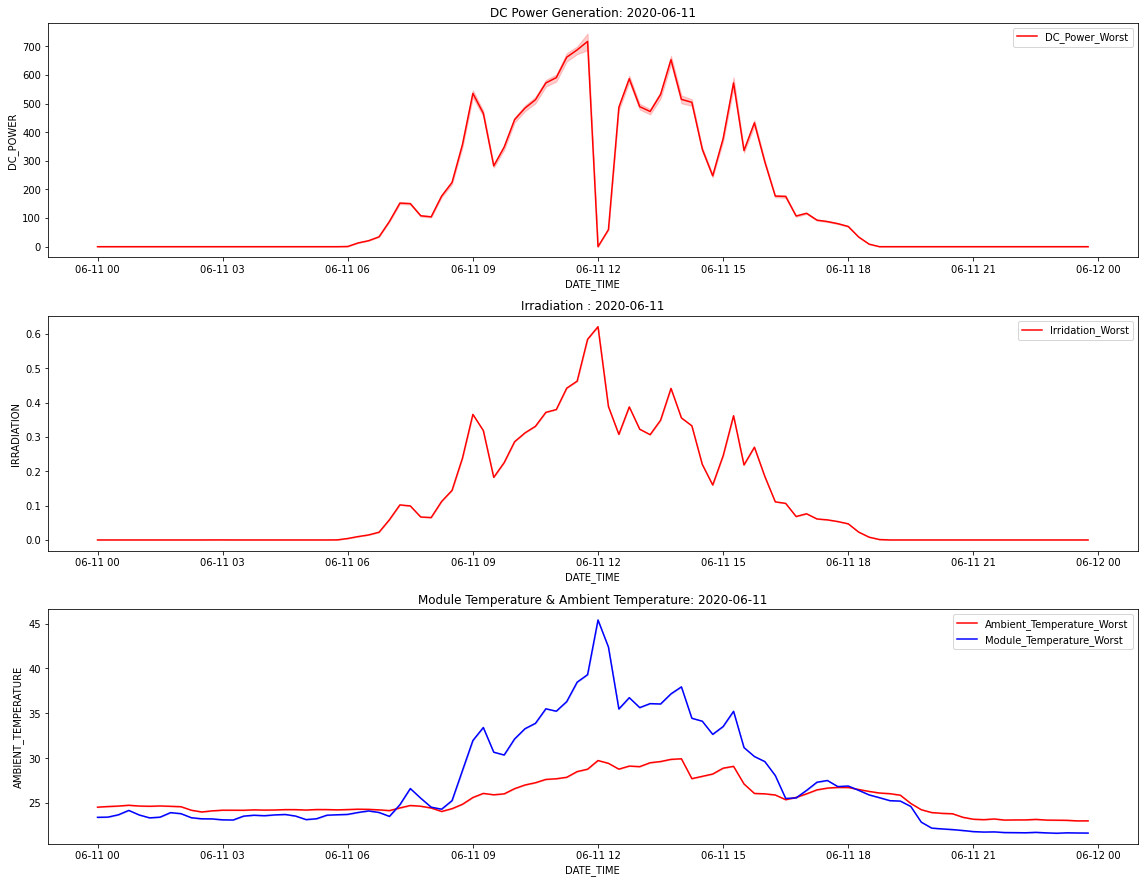

In [24]:
date=["2020-06-11"]
plt.figure(figsize=(16,16))

plt.subplot(411)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Worst",color='red');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Worst",color='red');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Worst",color='red');
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME, df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Worst",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

   NOTE: There are very large fluctuations in both DC_POWER graph and IRRADIATION graph

**Possible Reasons for these large fluctuation in the DC_POWER, IRRADIATION, Ambient temperature, Module temperature:**

At about 12 O’clock there is a sharp decline in the DC_POWER generation from 700 to almost 20 KWatt. 

And at the same time IRRADIATION fall from 0.6 to 0.3 almost half.

Ambient temperature and Module temperature also fall drastically. Module temperature from 45 C to 35 C & Ambient temperature is also reduced. 

The possible reason for this reduction is due to may be heavy rain and heavily clouded sky and bad weather. There is almost very less possibility of any fault in the system

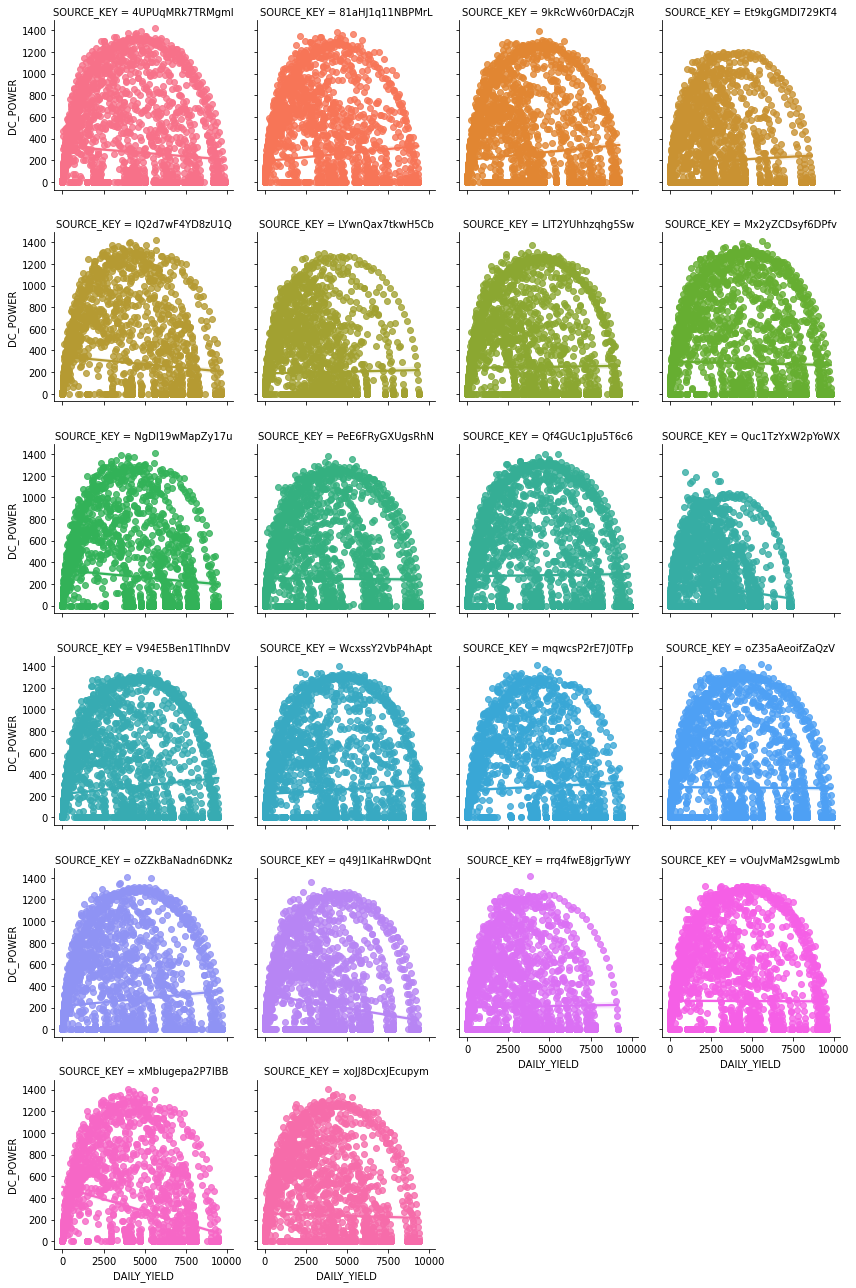

In [25]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

# Solar Power Plant Inverter Efficiency Calculation

In [26]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [27]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [28]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [29]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

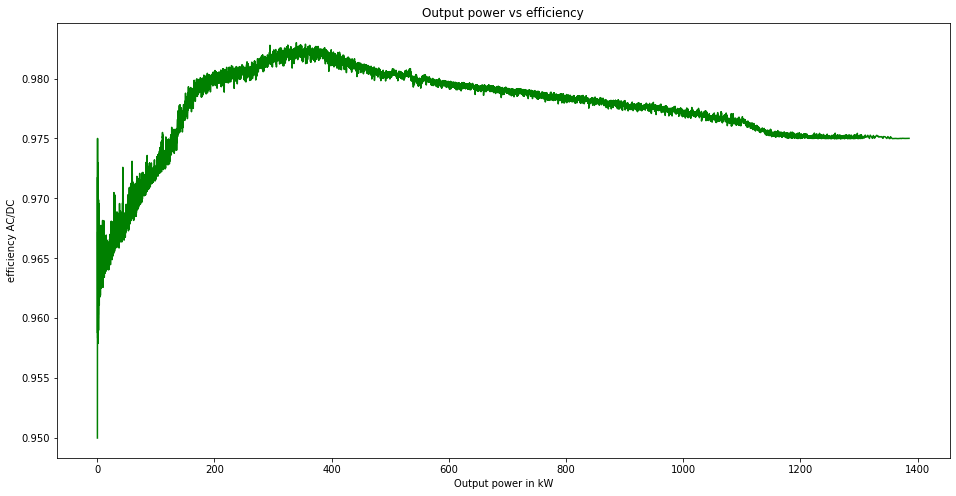

In [30]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

### 11. What does inverter efficiency mean?

- In fact, we shall discuss here the general power inverter efficiency whether it’s solar inverter or pure sine wave inverter or even modified sine wave inverter.

- The inverter efficiency refers to how much dc power will be converted to ac power, as some of power will be lost during this transition in two forms:

*Heat loss.*
- Stand-by power which consumed just to keep the inverter in power mode. Also, we can refer to it as inverter power consumption at no load condition.

- Hence, inverter efficiency = pac/pdc where pac refers to ac output power in watt and pdc refers to dc input power in watts.

<img src="https://www.inverter.com/images/uploaded/inverter-output-power-efficiency-diagram.jpg" alt="Solar Panel" width="90%">
</center>
 For the two basic inverters types in the market, the typical efficiency of high-quality pure sine wave inverter varied from 90% to 95% and for low quality modified sine wave inverter, it varied from 75% to 85%.

This power inverter efficiency value depends on inverter load power capacity variation, as the efficiency increases and may reach to its max value at higher load power capacity in compare to lower loading power capacity, and in condition that not going above inverter output power capacity limit. Generally, below 15% inverter loading, the efficiency will be quite low. Consequently, good matching between inverter capacity and its load capacity will enable us harvest larger efficiency, which means larger inverter ac output power for the same dc input power.

[REFERENCE: ](https://www.inverter.com/what-is-inverter-efficiency)

# Solar Power Prediction

In [31]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [32]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000,2.429e+06,27.005,25.061,0.0,0.0
1,0.000,1.215e+09,27.005,25.061,0.0,0.0
2,3075.333,2.248e+09,27.005,25.061,0.0,0.0
3,269.933,1.704e+06,27.005,25.061,0.0,0.0
4,3177.000,1.994e+07,27.005,25.061,0.0,0.0


In [33]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

## 1. LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


## 2. RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


## 3. DecisionTreeRegressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


### 12. Result Prediction

In [39]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.74088571 ...    0.         1007.1344
    0.        ]


In [40]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
40426,0.000,0.000
50974,0.000,0.000
53919,684.913,684.741
2384,0.000,0.000
22014,0.000,0.000


In [41]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
40426,0.000,0.000,0.000
50974,0.000,0.000,0.000
53919,684.913,684.741,0.172
2384,0.000,0.000,0.000
22014,0.000,0.000,0.000


In [42]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })


,Actual,Predicted,Error
384,0.000,0.000,0.000
34152,0.000,0.000,0.000
13124,645.664,645.721,-0.057
43107,682.629,682.608,0.020
55641,95.607,95.640,-0.033
16586,550.747,550.674,0.073
57825,257.920,257.914,0.006
8595,0.000,0.000,0.000
52122,299.753,299.802,-0.049
31140,218.786,218.707,0.079


## Conclusion

Power Generation Data and Weather Sensor Data can be used to evaluate the performance of a Solar Power Plant, to detect faulty circuit or equipments / Modules and to identify the need of module cleaning etc.

Using the Weather forecast data (Irradiation and Ambient Temperature), AC Power output of the plant can be predicted with a good accuracy. This helps in an effective Grid Management and saves the society from an unwanted Voltage Fluctuation and Power outag